In [1]:
# load all the wsb_* files

import pandas as pd
import numpy as np

# load all the wsb_* files
stocks = ["GME", "AMC", "BB", "TSLA", "PLTR", "MSFT", "BBBY", "SPY", "AAPL"]

dfs = {}
for stock in stocks:
    df = pd.read_csv(f"wsb_{stock}.csv")
    dfs[stock] = df

dfs["GME"].head()

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,original_body
0,2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47.0,1.611862e+09,ceo nasdaq push halt trading investor chance r...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
1,6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53.0,1.611862e+09,hedgefund whale spread disinfo say friday make...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
2,7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178.0,1.611862e+09,life not fair mother tell complain arbitrary t...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
3,10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70.0,1.611862e+09,believe right rare opportunity help good compa...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
4,12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16.0,1.611861e+09,guy champs gme think bunch crazy retard reach ...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...


In [4]:

# load profanity_wordlist.txt into a list
profanities = []
with open("profanity_wordlist.txt", "r") as f:
    for line in f:
        profanities.append(line.strip())

def extract_profanity(text):
    """Extract profanity from text"""
    text = str(text)
    text = text.lower()
    profanity = []
    for word in text.split():
        if word in profanities:
            profanity.append(word)
    return profanity

GME 20163


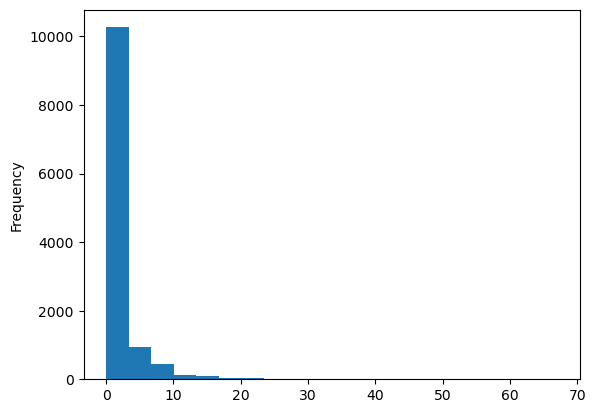

AMC 5662


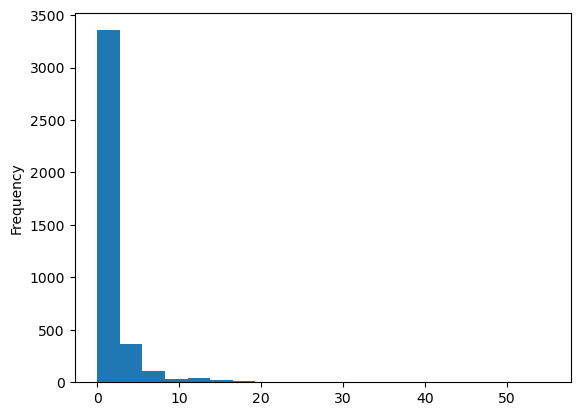

BB 14309


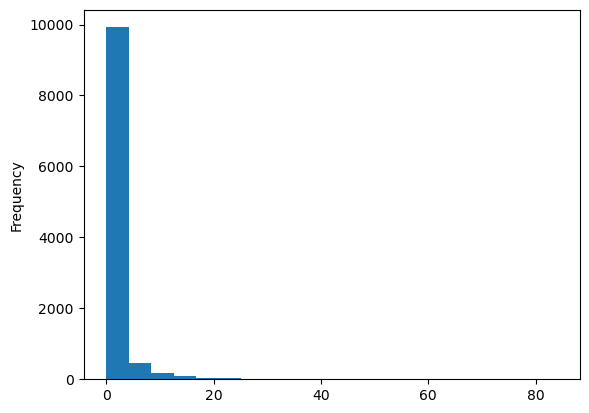

TSLA 9878


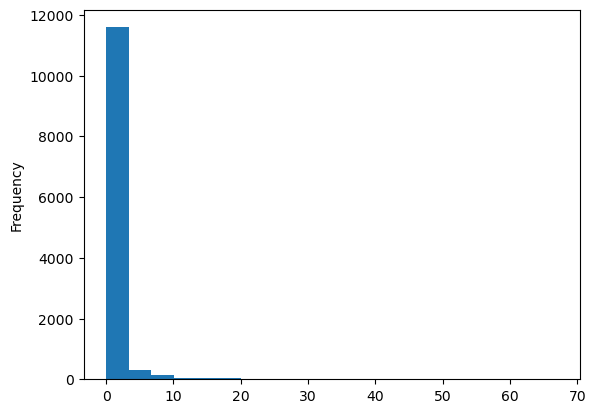

PLTR 1368


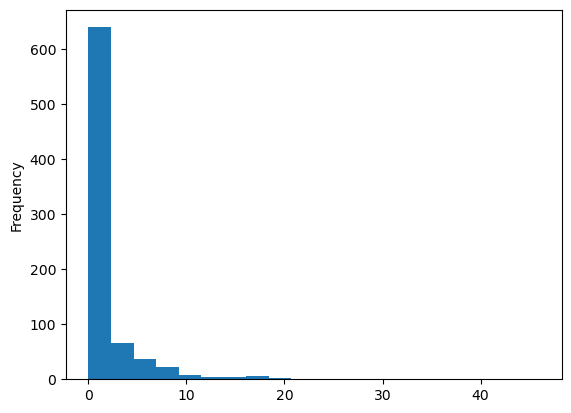

MSFT 1265


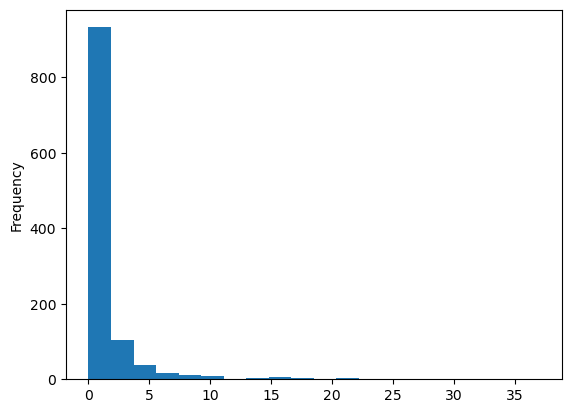

BBBY 3441


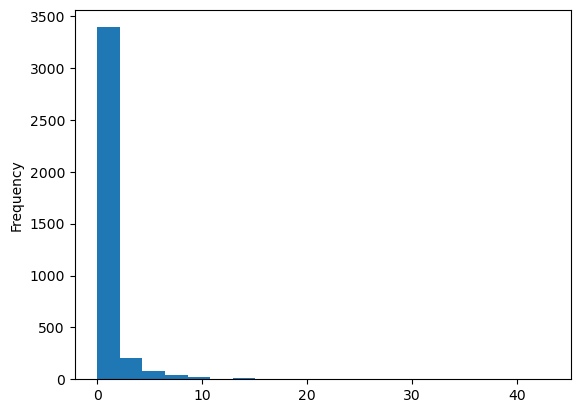

SPY 4001


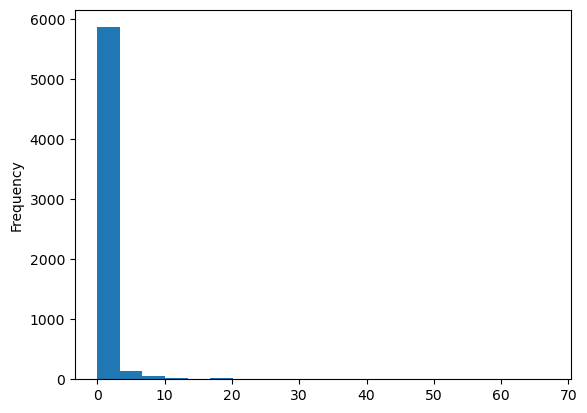

AAPL 2923


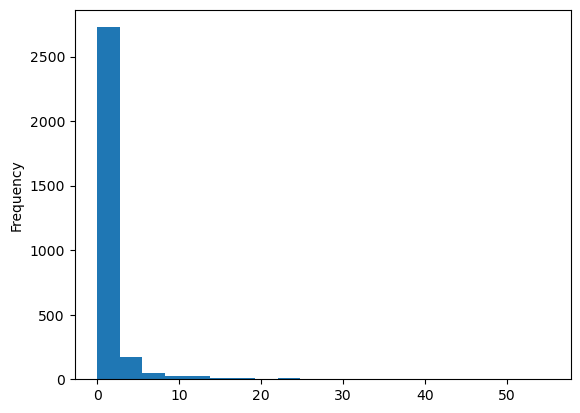

In [5]:
# get profanities for each stock
import matplotlib.pyplot as plt

for stock in stocks:
    df = dfs[stock]
    df["profanity"] = df["body"].apply(lambda x: " ".join(extract_profanity(x)))
    df["profanity_count"] = df["body"].apply(lambda x: len(extract_profanity(x)))
    print(stock, df["profanity_count"].sum())
    df["profanity_count"].plot(kind="hist", bins=20)
    plt.show()

In [27]:
df = dfs["GME"]
# print sample profanity at least 1
df[df["profanity_count"] > 0]["profanity"].sample(10)

5369                                                retard
7523     naked naked naked naked naked naked naked nake...
3799                                         shit bullshit
2731                              motherfucker rape retard
3708                                                   gay
5885                                                 screw
481                                                   shit
10005                                                  tit
2862     fuck fucking pedophile sex fuck asshole turd f...
10994                                                 weed
Name: profanity, dtype: object

In [28]:
# print percentage of posts with at least 1 profanity
for stock in stocks:
    df = dfs[stock]
    print(stock, df[df["profanity_count"] > 0].shape[0] / df.shape[0])

GME 0.4700383909197129
AMC 0.4090794451450189
BB 0.37774265526217926
TSLA 0.2848370722122155
PLTR 0.42118537200504413
MSFT 0.31862312444836716
BBBY 0.34126354744911447
SPY 0.23546701502286088
AAPL 0.2936717205009888
